In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score

# Load dataset
df = pd.read_csv("/Users/omkarkalekar/Downloads/hamspam.csv.csv")

In [7]:
# Convert categorical data to numerical
binary_mapping = {"Yes": 1, "No": 0, "Long": 1, "Short": 0, "Spam": 1, "Ham": 0}
df = df.replace(binary_mapping)
df = df.astype(int)  # Ensures correct type conversion

# Define features and target
X = df.drop(columns=["Class"])
y = df["Class"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


/var/folders/d8/wx18yll93kgg250hh1ld783c0000gn/T/ipykernel_95494/698523596.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(binary_mapping)


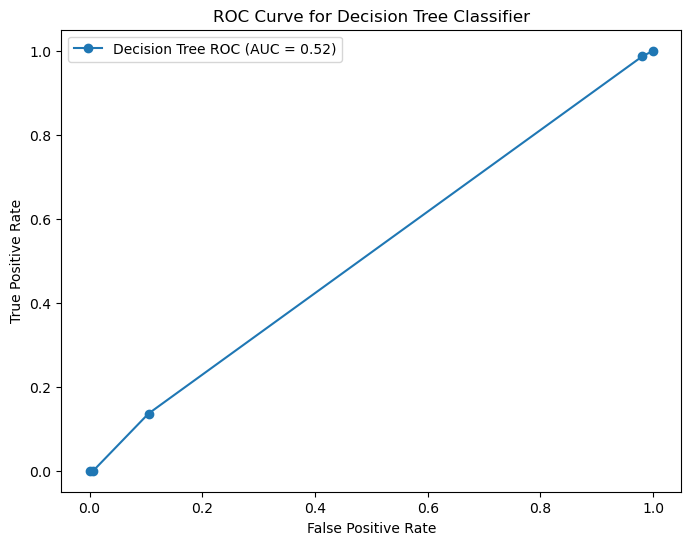

Decision Tree AUC Score: 0.52


In [9]:



# Train Decision Tree Classifier (with max_depth reduction for better performance)
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_model.fit(X_train, y_train)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Compute ROC Curve
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, marker='o', linestyle='-', label=f'Decision Tree ROC (AUC = {auc_dt:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree Classifier")
plt.legend()
plt.show()

# Print AUC Score
print(f"Decision Tree AUC Score: {auc_dt:.2f}")
